# Engrailed Detector Analysis

In [194]:
import sys
if 'google.colab' in sys.modules: #Running on Colab
    !git clone https://github.com/alsinmr/pyDR.git
else: #Running on my computer
    sys.path.append('/Users/albertsmith/Documents/GitHub/')
    
import pyDR
import numpy as np
from copy import copy
from scipy.optimize import lsq_linear
import matplotlib.pyplot as plt

pyDR.Defaults['zrange']=[-12,-8,200]

Data provided by Fabien Ferrage, from:

Khan, Charlier, Augustyniak, Salvi, Déjean, Bodenhausen, Lequin, Pelupessy, Ferrage. "Distribution of Pico- and Nanosecond Motions in Disordered Proteins from Nuclear Spin Relaxation." **2015**, *Biophysical J.*, 109, 988-989

## Detectors concept|

The set of experiments used for engrailed is 5 $^{15}$N T$_1$ experiments, 5 heteronuclear NOEs, and 2 T$_2$ measurements (actually, I think we calculated T$_2$ from cross-correlated cross-relaxation. We do support ccZ/ccXY now, but when we did this analysis, we didn't have that implemented, so we just calculated what T$_2$ should be).

In [195]:
data=pyDR.IO.readNMR('https://drive.google.com/file/d/17NurbP4k7ESZijw4elAwAh-s4UmMj3WG/view?usp=sharing')

The basic idea behind detectors is that each experiment has a function describing how sensitive it is to each correlation time. Below, the first five curves correspond to the NOEs, the second 5 to the T$_1$s, and the last two (almost on top of each other) correspond to the T$_2$s. Then, data may be recombined to yield more separated ranges of correlation times.

<IPython.core.display.Javascript object>


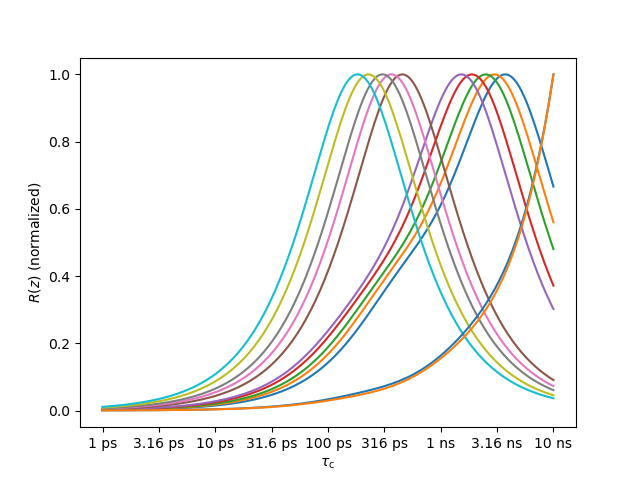

In [196]:
data.sens.plot_Rz(norm=True);

In principle, the 12 sensitivities above represent 12 potential fit parameters, but there is a lot of redundancy, so we want to reduce the number of parameters. Usually, one fits such a data set with 6 parameters, although actually only 5 of those are independent (the 6th comes from knowing that the order parameter must be zero). So we reduce the above curves first to 5 functions via singular value decomposition.

<IPython.core.display.Javascript object>


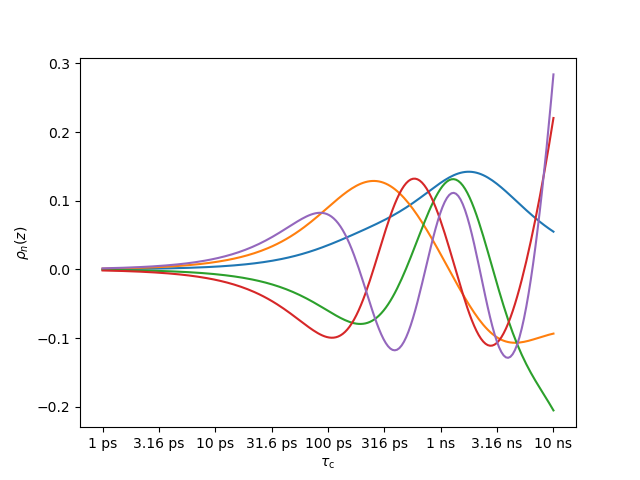

In [197]:
r=data.sens.Detector()
r.r_no_opt(5)
r.plot_rhoz();

These aren't particularly useful on their own, so we do a second step, where we recombine the 5 curves to get 5 positive, well-separated functions. We also add one more curve, considering that we do know the total amplitude of motion is 1 (i.e. that S=0)

<IPython.core.display.Javascript object>


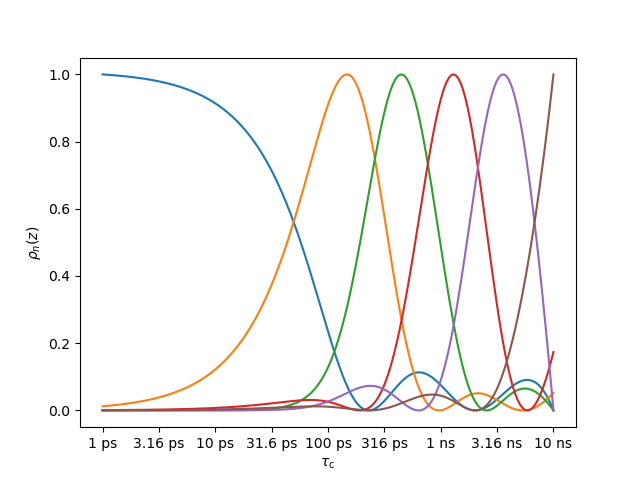

In [198]:
r.r_auto(5).inclS2()
r.plot_rhoz();

## Detectors fit

Finally, with optimized detectors, we can fit and plot the detector analysis of the engrailed data

<IPython.core.display.Javascript object>


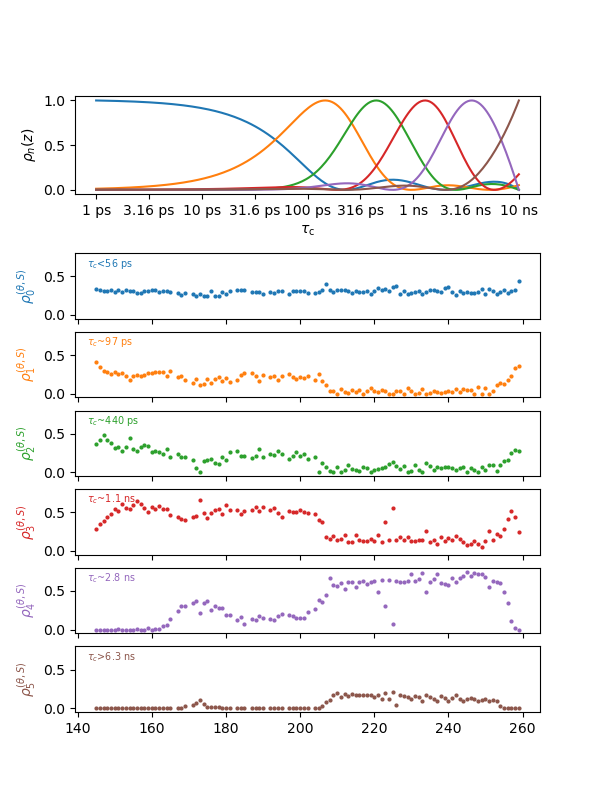

In [199]:
data.detect.r_auto(5).inclS2()  #This is the fit setup (how many detectors, and use S2, which equals 0)
fit=data.fit()  #This is the actual fit
po=fit.plot(style='scatter',markersize=2)
po.fig.set_size_inches([6,8])
for a in po.ax:a.set_ylim([-.05,.8])
po.show_tc()

What this tells us is that for each "sensitivity window" at the top, we find a certain amount of motion within that window, given for each window in the plots below. We see that for disordered regions, motion is faster, and becomes isotropic at shorter correlation times, but for the helical region (~205-250), we see a more global, slower motion in the nanosecond ($\rho_4$, ~2.8 ns) range.

We can also evaluate the quality of the data fit with detectors, seen below, where bars with error bars are the input data and scatter points are the fit.

<IPython.core.display.Javascript object>


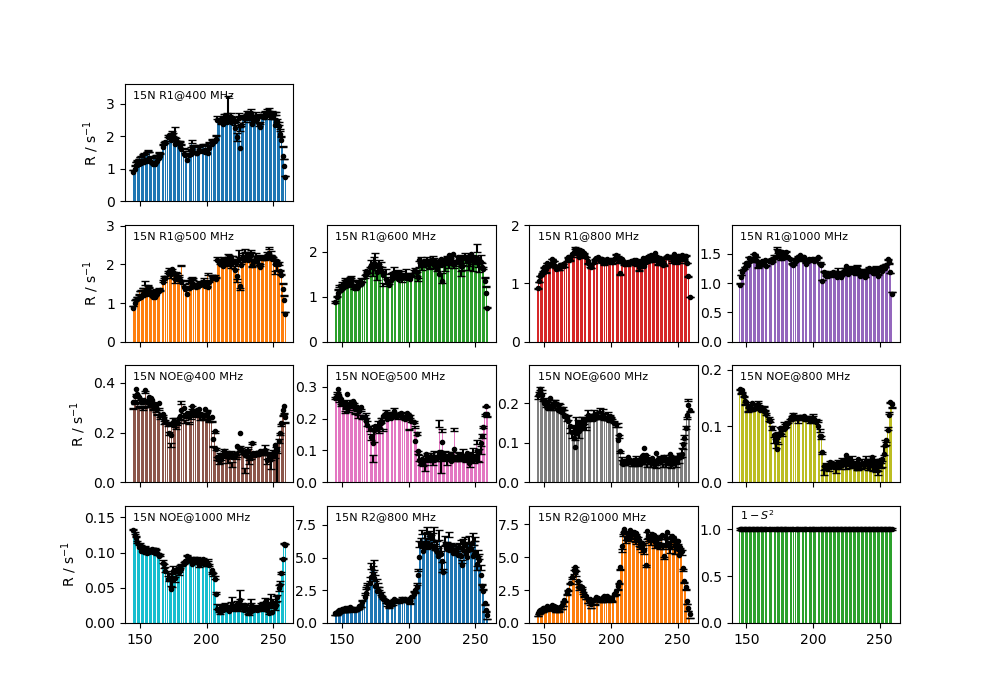

In [201]:
fit.plot_fit()[0].figure.set_size_inches([10,7])